<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Dataloaderr%2CDatasets_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader,random_split
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = [1,2,4]

In [ ]:
y = iter(x)

In [ ]:
a = (next(y))
print(type(a))

<class 'int'>


In [ ]:
id(a)

140225143505136

In [ ]:
for i in iter(x):
  print(i)

1
2
4


In [ ]:
y = list(x)

In [ ]:
!wget https://raw.githubusercontent.com/JavohirJalilov/Classification/master/Iris.csv

--2023-06-24 15:21:31--  https://raw.githubusercontent.com/JavohirJalilov/Classification/master/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv’

Iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2023-06-24 15:21:31 (78.5 MB/s) - ‘Iris.csv’ saved [5107/5107]



In [ ]:
import pandas as pd

In [ ]:
# class Iris:
#   def __init__(self,fname):
#     labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
#     self.data = np.loadtxt(
#                   fname=fname,
#                   dtype=np.float32,
#                   skiprows=1,
#                   delimiter=',',
#                   converters={
#                       5:lambda x: labels.index(x.decode())
#                   })
#   def __getitem__(self,ind):
#     x = torch.tensor(self.data[ind,:1:[-1]],dtype=torch.float32)
#     y = torch.tensor(self.data[ind,-1],dtype=torch.float32)
#     return x,y
#   def __len__(self):
#     return len(self.data)

In [ ]:
class IrisDataset(Dataset):

  def __init__(self,path):
    labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
    data = np.loadtxt(path,delimiter=',',skiprows=1,converters={5: lambda s: labels.index(s.decode("utf-8") )},dtype=np.float32)
    self.features = torch.from_numpy(data[:,:4])
    self.labels = torch.from_numpy(data[:,4].astype(int))
    self.n_samples = data.shape[0]
  def __getitem__(self,index):
    return self.features[index],self.labels[index]
  def __len__(self):
    return self.n_samples

In [ ]:
index

NameError: ignored

In [ ]:
train_data,test_data = random_split(iris,[100,50])

In [ ]:
train_dataloder =  DataLoader(train_data,batch_size=10)
test_dataloader = DataLoader(test_data,batch_size=10)

In [ ]:
for i in iter(train_data):
  print(i)
  break

(tensor([88.0000,  6.3000,  2.3000,  4.4000]), tensor(1))


In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=input, out_features=64)
        self.fc2 = torch.nn.Linear(in_features=64, out_features=64)
        self.fc3 = torch.nn.Linear(in_features=64, out_features=output)
        self.relu = torch.nn.ReLU()
        self.softmax =torch.nn.Softmax(dim=1)
        # Activation function


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.softmax(self.fc3(x))



        return out

In [ ]:
net = Net(4,3)

In [ ]:
# loss and optimizer
learning_rate = 0.001
# Binary Cross Entropy between the target and the output:
criterion =nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)

In [ ]:
for x,y in train_dataloder:
  print(x)
  break

tensor([[ 88.0000,   6.3000,   2.3000,   4.4000],
        [ 53.0000,   6.9000,   3.1000,   4.9000],
        [ 63.0000,   6.0000,   2.2000,   4.0000],
        [ 90.0000,   5.5000,   2.5000,   4.0000],
        [ 91.0000,   5.5000,   2.6000,   4.4000],
        [110.0000,   7.2000,   3.6000,   6.1000],
        [ 34.0000,   5.5000,   4.2000,   1.4000],
        [118.0000,   7.7000,   3.8000,   6.7000],
        [ 23.0000,   4.6000,   3.6000,   1.0000],
        [ 84.0000,   6.0000,   2.7000,   5.1000]])


In [ ]:
def accuracy(y_pred, y):
  y_pred = y_pred.argmax(axis=1)
  acc = sum(y_pred == y)/len(y)
  return acc

In [ ]:
history = {'loss':[], 'loss_val':[], 'accuracy':[], 'val_accuracy':[]}

In [ ]:
epochs = 500
for epoch in range(epochs):
  for (train_x,train_y),(test_x,test_y) in zip(train_dataloder,test_dataloader):
    optimizer.zero_grad()

    y_hat = net(train_x)
    loss = criterion(y_hat,y)
    loss.backward()
    y_pred = net(test_x)
    loss_val = criterion(y_pred,test_y)
    # update parameters
    optimizer.step()
    acc = accuracy(y_hat,train_y)
    val_acc = accuracy(net(test_x),test_y)
    history['loss'].append(loss.item())
    history['loss_val'].append(loss_val.item())
    history['accuracy'].append(acc.item())
    history['val_accuracy'].append(val_acc.item())
  if epoch%50==0:
    print(f'epoch {epoch} , loss {loss.item():.3f}, loss_vall {loss_val.item()}, accuracy {acc.item()}, val accuracy {val_acc.item()}')

epoch 0 , loss 0.966, loss_vall 0.9871097803115845, accuracy 0.6000000238418579, val accuracy 0.5
epoch 50 , loss 0.996, loss_vall 0.9558388590812683, accuracy 0.6000000238418579, val accuracy 0.5
epoch 100 , loss 0.998, loss_vall 0.912815272808075, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 150 , loss 1.006, loss_vall 0.9177447557449341, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 200 , loss 1.014, loss_vall 0.9257216453552246, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 250 , loss 1.017, loss_vall 0.9430932998657227, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 300 , loss 1.016, loss_vall 0.9449852108955383, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 350 , loss 1.013, loss_vall 0.9472271203994751, accuracy 0.6000000238418579, val accuracy 0.6000000238418579
epoch 400 , loss 1.009, loss_vall 0.9482086300849915, accuracy 0.6000000238418579, val accuracy 0.6000000238418579

In [ ]:
pred = net(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred = pred.argmax(axis=1)
pred

tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

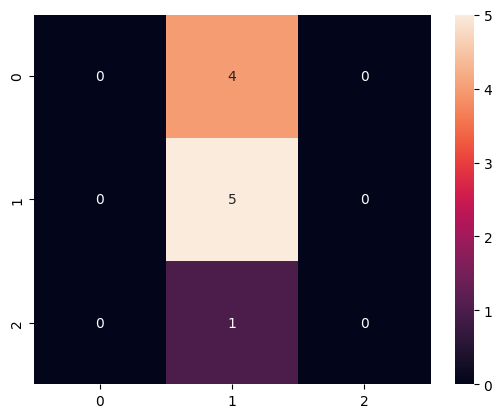

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
cm =confusion_matrix(test_y,pred)

In [ ]:
def plot_accuracy(accuracy:list, val_accuracy:list, epochs:int)->None:
  lists=[i for i in range(epochs)]
  plt.plot(lists, accuracy)

  plt.plot(lists, val_accuracy)
  plt.show()

ValueError: ignored

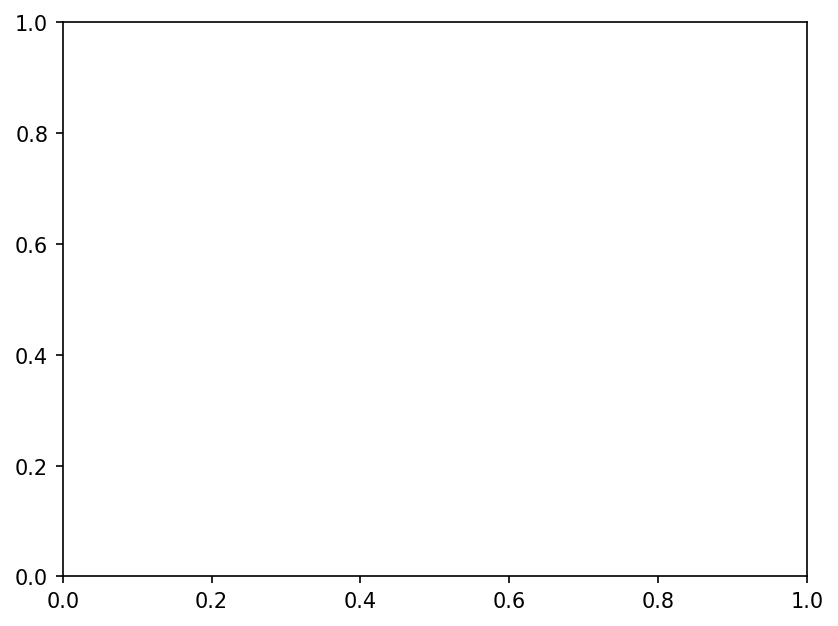

In [ ]:
plt.figure(dpi=150)

plot_accuracy(history['accuracy'], history['val_accuracy'], epochs)

In [ ]:
def plot_accuracy(accuracy:list, val_accuracy:list, epochs:int)->None:
  lists=[i for i in range(epochs)]
  plt.plot(lists, accuracy)

  plt.plot(lists, val_accuracy)
  plt.show()

ValueError: ignored

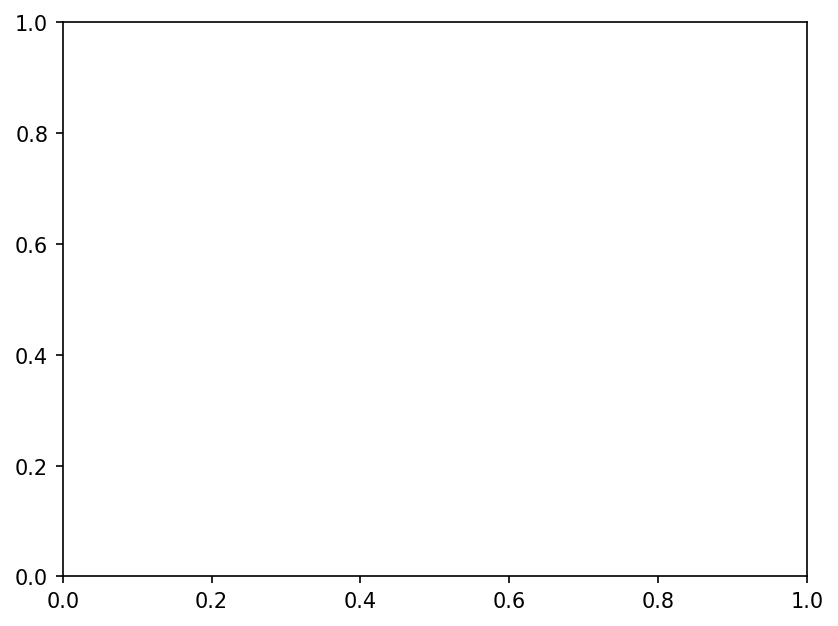

In [ ]:
plt.figure(dpi=150)

plot_accuracy(history['accuracy'], history['val_accuracy'], epochs)

In [ ]:
sum(pred==test_y)/len(test_y)*100

tensor(60.0000)